<a href="https://colab.research.google.com/github/Ayaj-Ahmed/CAPSTONE-EDA/blob/main/Airbnb_Bookings_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b> Data Exploration on Airbnb (NYC)</b>
<b>Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.</b>

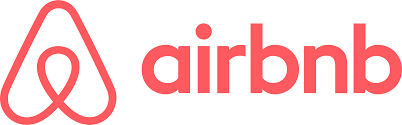

In [42]:
# Importing necessary libraries for analysis of the dataset.
#This dataset has around 48,895 observations in it with 16 columns and it is a mix between categorical and numeric values.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/Ayaj-Ahmed/CAPSTONE-EDA/main/airbnbnyc2019.csv'
airbnb=pd.read_csv(url)
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
# checking the number of rows in the given dataset to understand the size of the data
print("Rows             :",airbnb.shape[0])
print("Columns          :",airbnb.shape[1])
print("\nFeatures       :\n",airbnb.columns.tolist())
print("\nMissing Value  :\n",airbnb.isnull().sum())
print("\nTotal Number of Missing Value in the Dataset    :",airbnb.isnull().sum().sum())
print("\nColumns with missing value:\n",airbnb.isnull().any())

Rows             : 48895
Columns          : 16

Features       :
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing Value  :
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Total 

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#<b>We have 4 column that contains a missing value</b>
name, host_name, last_review & reviews_per_month.

1) Name:- We dont need this column as we can do with host "ID" instead for the sake of simplicity as recreating the missing values is limitation on part 

2) host_name:- No rationale could be formed to continue data exploration towards specific individuals based on their names. For ethical reason keeping data privacy norms in minds we are dropping this column

3) last_reviews:- This column is irrelevant as no concencrete observation can be deduced from this column hence we are dropping this column

4) reviews_per_month- It had been assumed that there is no reviews for the listing leading to the blank cells hence a value of "0" (zero) can be assigned to those missing values/blank cells for a simplified approach.

In [5]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#Checking out the results
airbnb.reviews_per_month.isnull().sum()

0

In [6]:
#dropping columns that are not important for data analysis or could be unethical to use for data exploration and predictions
airbnb.drop(['name','host_name','last_review'], axis=1, inplace=True)
#Checking out the results
airbnb.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


##<b> Let's Explore the Dataset </b>

##<b> Q1. What can we learn about different hosts and areas?</b>


##<b>New York is made up of five major areas or “boroughs,” some separated by rivers and connected via ferry or bridge. So, what are the five boroughs of New York ? </b>
##<b>1) Manhattan, 2) Brooklyn, 3) Queens, 4) Staten Island, and 5) The Bronx.</b>

(A Borough is a town or district which is an administrative unit)

In [7]:
#Starting by Capturing the unique data of neighbourhood_groups
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

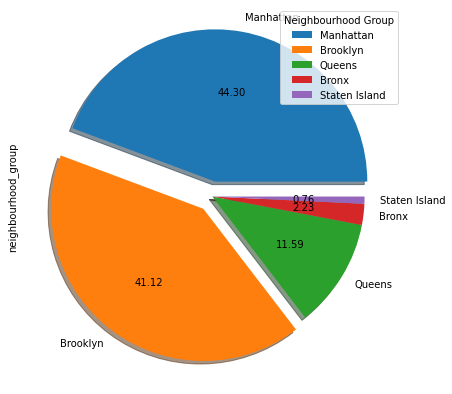

In [8]:
#Pie Chart for the distribution of listing in Airbnb across neighbourhood_group at NYC 
airbnb['neighbourhood_group'].value_counts().plot.pie(y='neighbourhood_group',figsize=(13,7), explode=[0.1,0.1,0,0,0], shadow= True, autopct='%.2f')
plt.legend(title= 'Neighbourhood Group')

##<b>Manhatten has the maximum 21,661 listing in Airbnb in NYC

In [9]:
#Count of hosting across neighbourhood  group
hosting=airbnb.neighbourhood_group.value_counts()
hosting

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [10]:
#setting figure size for future visualizations
hosting_df=pd.DataFrame(hosting)
hosting_df.reset_index(inplace=True)
hosting_df.rename(columns={'index':'Neighbourhood_Groups', 'neighbourhood_group':'Number_of_Listing'}, inplace=True)
hosting_df

,Neighbourhood_Groups,Number_of_Listing
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


Text(0.5, 0, 'Host IDs on Airbnb')

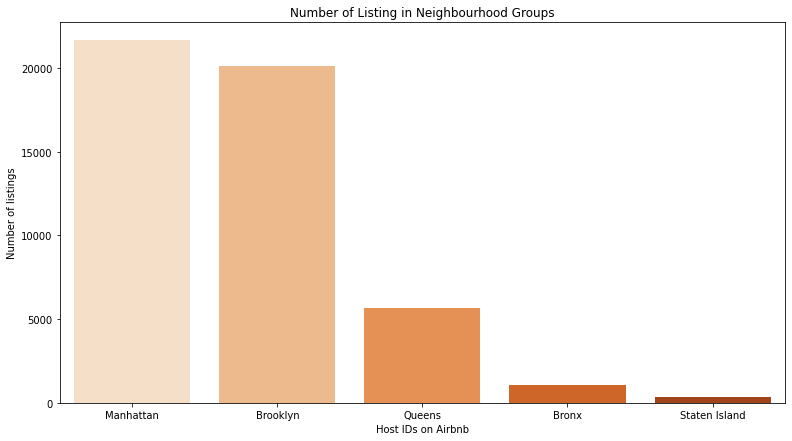

In [11]:
#Using seaborn barplot for visualization
plt.subplots(figsize=(13,7))
viz_2=sns.barplot(x="Neighbourhood_Groups", y="Number_of_Listing", data=hosting_df, palette="Oranges")  
plt.title('Number of Listing in Neighbourhood Groups')
viz_2.set_ylabel('Number of listings')
viz_2.set_xlabel('Host IDs on Airbnb')

In [12]:
#Starting by Capturing the unique data of neighbourhood
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

##<b>The total number of neighbourhood is 221 situated among the 5 neighbourhood group

In [13]:
len(airbnb.neighbourhood.unique())

221

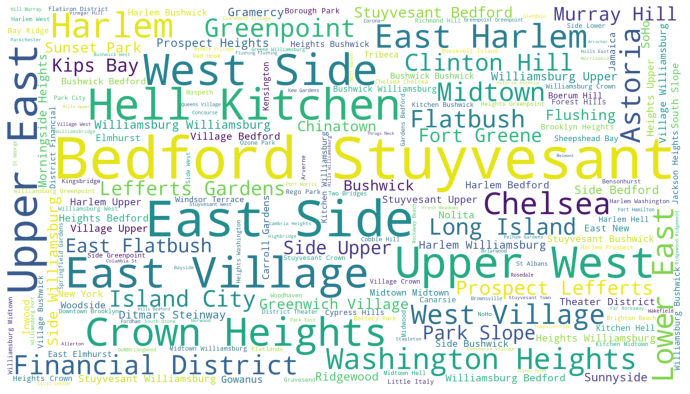

In [14]:
from wordcloud import WordCloud
plt.subplots(figsize=(13,7))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##<b> Host ID "219517861" have 327 listing !!!... The highest across New York City</b>

In [15]:
#Lets find out the host with the maximum listing on Airbnb site for NYC
top_host_check=airbnb.calculated_host_listings_count.max()
airbnb.loc[airbnb['calculated_host_listings_count'] == top_host_check].head(1)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.0,327,309


##<b>The top 10 host_ID with the most listing, taking maximum utility out of Airbnb service


In [16]:
#Lets find the top 10 host_ID with the most listing, taking maximum utility out of Airbnb service
top_10_host=airbnb.host_id.value_counts().head(10)
print(top_10_host)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [17]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(13,7)})
sns.set_style('white')
top_10_host_df=pd.DataFrame(top_10_host)
top_10_host_df.reset_index(inplace=True)
top_10_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_10_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Text(0.5, 0, 'Host IDs on Airbnb')

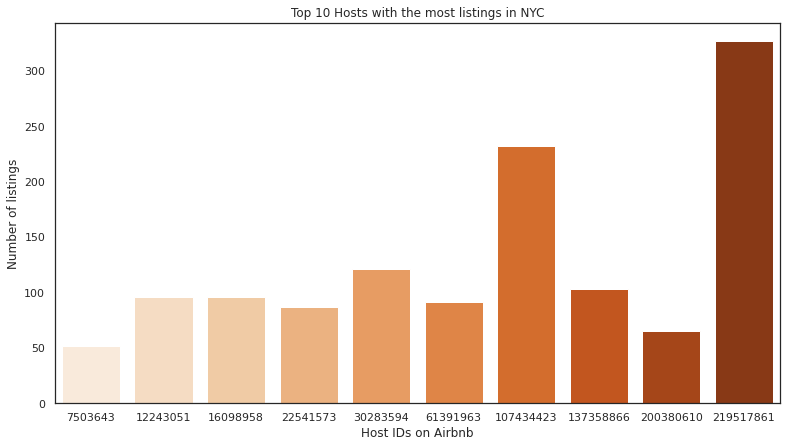

In [18]:
#Using seaborn barplot for visualization
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_10_host_df,palette='Oranges')   
viz_1.set_title('Top 10 Hosts with the most listings in NYC')
viz_1.set_ylabel('Number of listings')
viz_1.set_xlabel('Host IDs on Airbnb')

##<b>Listing of Top 20  neighbourhoodd

In [19]:
#as earlier reflected the values for neighbourhood are 221 which is way too many to concentrate on;
#therefore, let's see the top 20 neighbourhoods that have the most listings in them

#Searching out the top 20 neighbourhoods with highest listing count
airbnb.neighbourhood.value_counts().head(20)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

##<b>The top 20 neighbourhood with highest listing categorised under their respective neighbourhood groups. The maximum crowding of hostings are in the neighbourhood of the boroughs of Manhatten, Brooklyn & Queens  
An analysis of a sample of top 20 neighbourhood with repect to their boroughs reflect the insight</b>

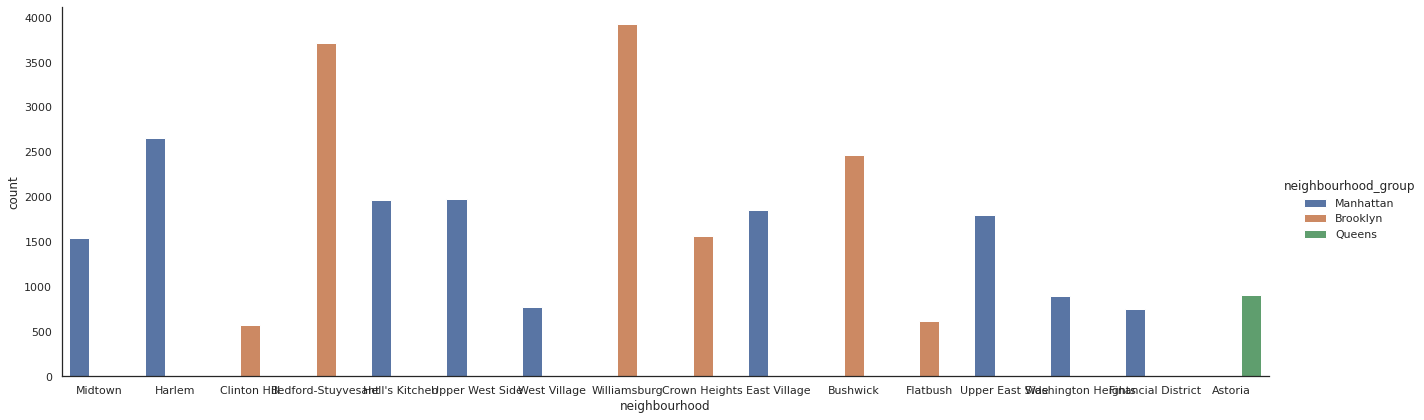

In [20]:
#let's now combine this data with our boroughs for a rich visualization and some meaninful insight

#grabbing top 20 neighbourhoods for sub-dataframe

sub_1=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown','East Harlem''Greenpoint',
                 'Chelsea''Lower East Side','Astoria','Washington Heights','West Village','Financial District','Flatbush','Clinton Hill'])]
#using catplot to represent multiple interesting attributes together and a count

viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', data=sub_1, kind='count', 
                  height=6, # make the plot 5 units high
                  aspect=3) # height should be three times width
#In Catplot plt.figure() gets ignored: The reason for this is that the higher level plotting functions in seaborn 
#(what the documentation calls Figure-level interfaces) have a different way of managing size, largely due to the fact that the often produce multiple subplots. 
#To set the size when using catplot() or relplot() (also pairplot(), lmplot() and jointplot()), use the height keyword to control the size 
#and the aspect keyword to control the shape:

##<b>65.86% Percentage of listing in Airbnb NYC happens to be in top 20 neighbourhood from the boroughs of Manhatten, Brooklyn & Queens </b> 

In [21]:
# Total Listing across neighbourhood
a= sum(airbnb.neighbourhood.value_counts())
# Listing across Top 20 neighbourhood
b= sum(airbnb.neighbourhood.value_counts().head(20))
# Percentage of listing in Top 20 Neighbourhood
print(f'{b/a*100}%')

65.86767563145516%


##<b>Visual of listing across New York City

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


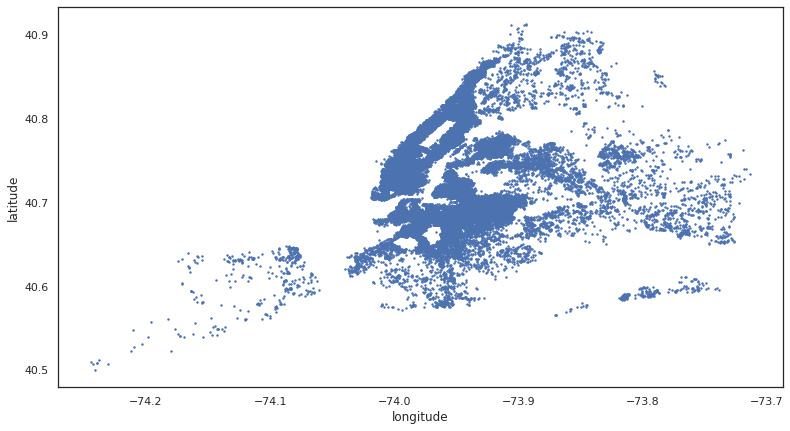

In [22]:
#visualising the listing across NYC using scatterplot matplotlib.pyplt
viz_5 =airbnb.plot(kind='scatter', x='longitude', y='latitude', figsize=(13,7),alpha=1,s=2)


##<b>Plotting the maximum and minimum of lattitude and longitude data as map ranges

In [23]:
#Map ranges for plotting the scatter of hosting in the Map of NYC based on latitudinal and longitudanl range of the Data
min_longitude=airbnb["longitude"].min()
max_longitude=airbnb["longitude"].max()
min_latitude=airbnb["latitude"].min()
max_latitude=airbnb["latitude"].max()
map_ranges=(min_longitude,max_longitude,min_latitude,max_latitude)
print(map_ranges)

(-74.24442, -73.71299, 40.49979, 40.91306)


##<b>On looking at the scatter plot its seen that Airbnb host listing at Staten Island is sparsely populated. Its densely populated at the boroughs of Manhattan, Brooklyn, Queens and Bronx.</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


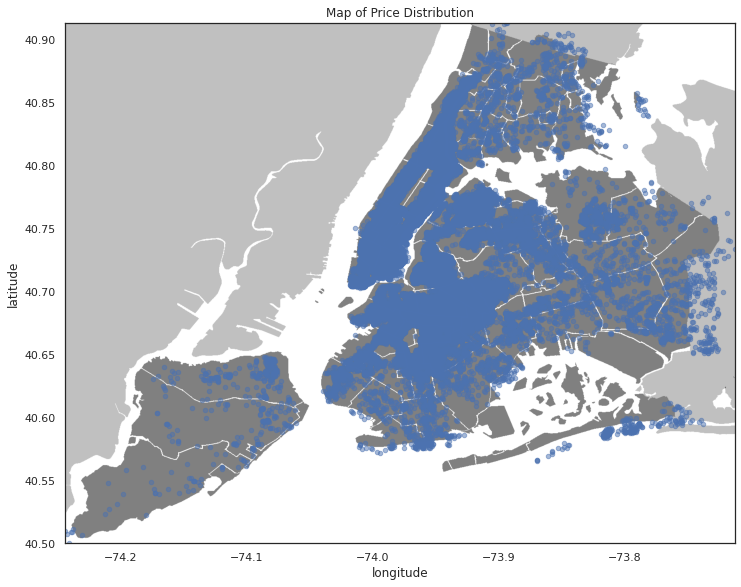

In [24]:
import urllib
#initializing the figure size
plt.figure(figsize=(12,24))
plt.title("Map of Price Distribution")
#Uploading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.24442, -73.71299, 40.49979,40.91306])
ax=plt.gca()
#using scatterplot again
airbnb.plot(kind='scatter', x='longitude', y='latitude', ax=ax,alpha=0.5)

##<b> Q2. What can we learn from predictions? (ex: locations, prices, reviews, etc)</b>

In [25]:
#Top 10 highest reviewed listing
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


##<b>The scatter plot shows that the red color dots are the rooms with a highest price. Also, we can see that the Manhattan region has a more expensive room price. The colorbar sows the range.</b>

Text(0.5, 1.0, 'Map of Price Distribution')

<Figure size 936x504 with 0 Axes>

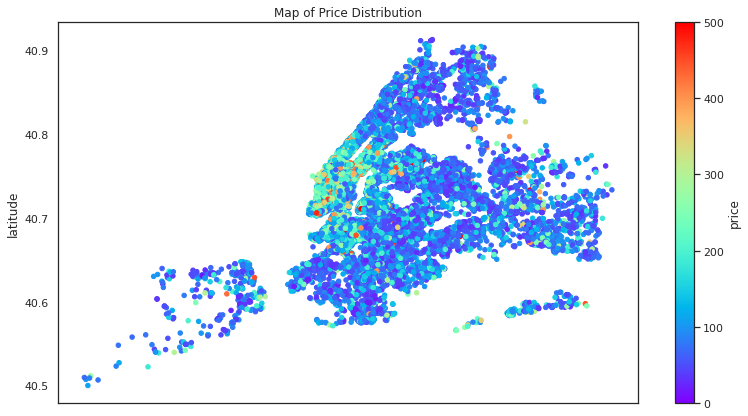

In [26]:
#color coding range for each point on the map based on the pricing of the listing. High pricing potrayed by Red dots. Lowest pricing by purple dots.
plt.figure(figsize=(13,7))
#we had to drop some extremely high values as they are treated as outliers for our analysis and only price less than equal to 500 considered.
airbnb[airbnb.price<=500].plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('rainbow'),colorbar=True,alpha=1)
plt.title("Map of Price Distribution")

## <b>The boxplot shows distribution range of prices for Airbnb in NYC that Manhattan has the highest range price for the listings with about dollar 140 as an average price, followed by Brooklyn with dollar 90 per night,Queens and Staten Island seem to have a very similar distribution,The Bronx is the cheapest</b>

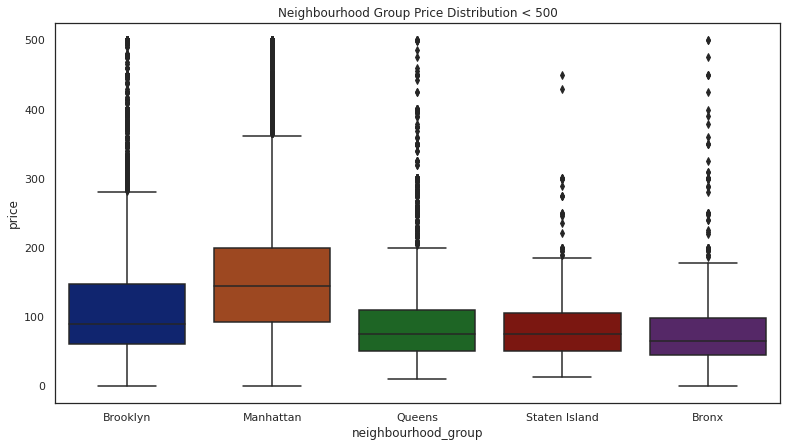

In [27]:
#Neighbourhood group pricing of  listing  range plotted on a box plot 
plt.figure(figsize=(13,7))
#we had to drop some extremely high values as they are treated as outliers for our analysis and only price less than equal to 500 considered.
sns.boxplot(data = airbnb[airbnb.price<=500],x ='neighbourhood_group',y='price', palette='dark')
plt.title('Neighbourhood Group Price Distribution < 500')
plt.show()

##<b> There is not a strong correlation between variables except review_per_month and number_of_review. There is moderate correlation between Host Listing count and availability.There is also a moderate correlation between reviews per month and availability.

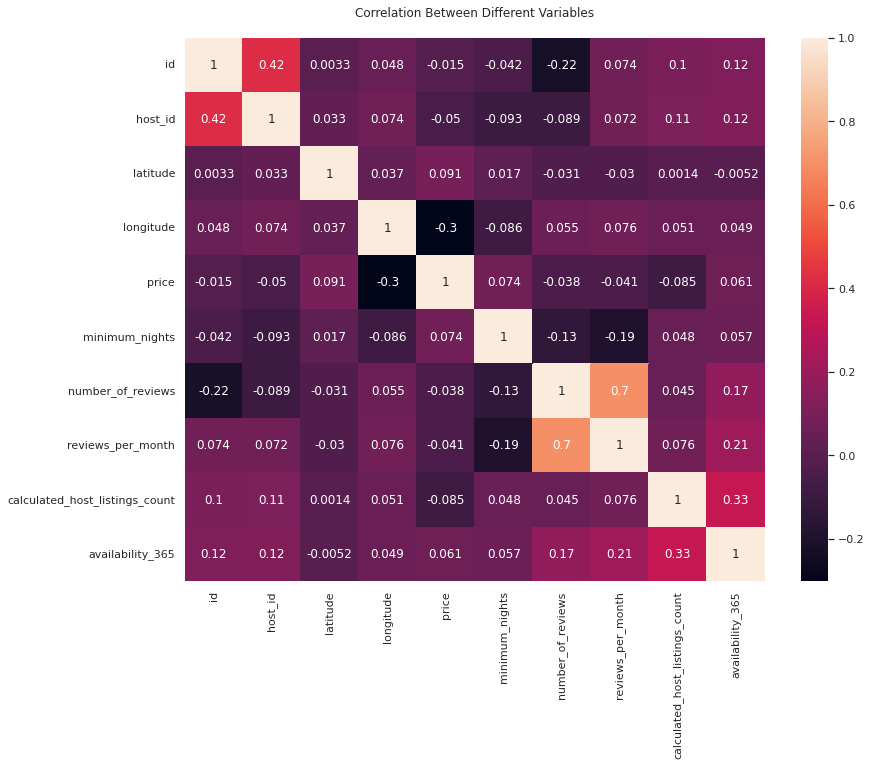

In [28]:
#Checking correlation among the variables
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)

##<b>The piechart shows the "Entire Home/Apartment" has the highest share, followed by the Private Room, and the least preferred is Shared Room in Airbnb platform during 2019</b>

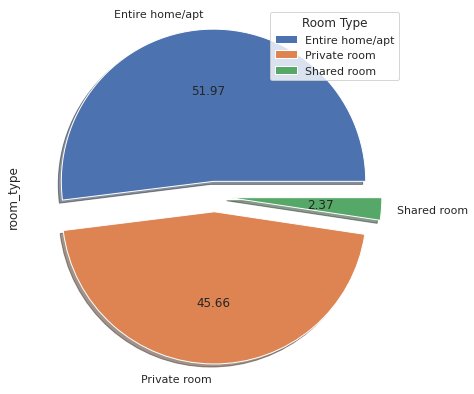

In [29]:
#Pie Chart for the distribution of room type in Airbnb at NYC 
airbnb['room_type'].value_counts().plot.pie(y='room_type',figsize=(13,7),explode=[0.1,0.1,0.1], shadow= True, autopct='%.2f')
plt.legend(title= 'Room Type')

## <b>The bar graph shows that the "Entire Home/Apartment" is listed mostly near Manhattan, while in Brooklyn share of listing of "Private Room" and "Entire Home/Apartments" are nearly equal.</b>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room Type on Neighbourhood Group')

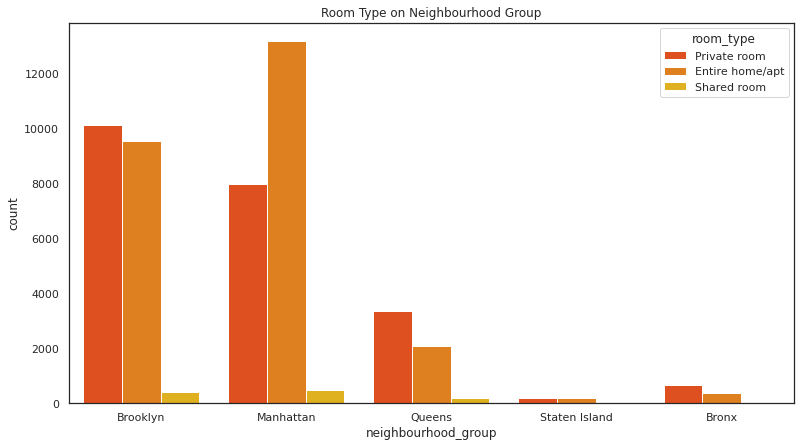

In [30]:
# Checking out the distribution of room type across neighbouhood groups
plt.figure(figsize=(13,7))
sns.countplot(airbnb.neighbourhood_group,hue=airbnb.room_type, palette="autumn", alpha=1)
plt.title("Room Type on Neighbourhood Group")

##<b>The boxplot shows the relationship between the room availability and neighborhood group. Mean availability of room is the highest in "Staten island" and the lowest in Brooklyn. Its can be easily deduced that room are scarcely available in Brooklyn in comparison to the remaining boroughs.</b>

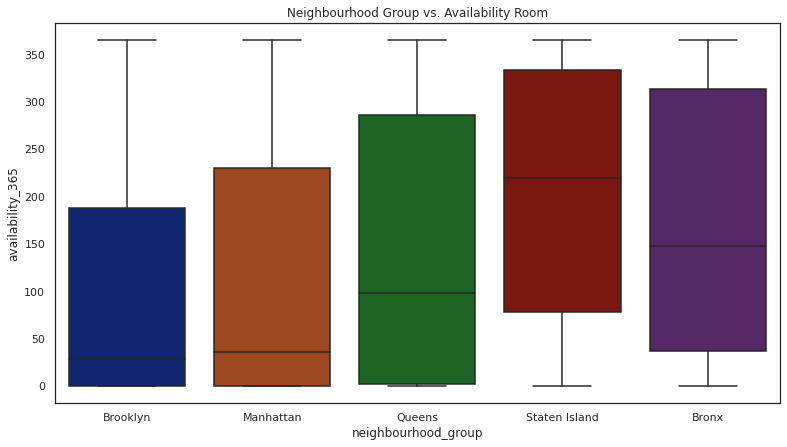

In [31]:
# plotting a boxplot tocheck the availability of rooms across neighbourhood groups.
plt.figure(figsize=(13,7))
sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette="dark")
plt.title("Neighbourhood Group vs. Availability Room")
plt.show()

##<b>Q3. Which hosts are the busiest and why?</b>

##<b>Host ID "17550546" is the most busiest Host as each visiting guest spend around minimum of 1250 Nights. </b>

In [32]:
#Finding out the busiest host one who has minimum nights(most) spent by the guest
busiest_hosts_1=airbnb.minimum_nights.max()
airbnb.loc[airbnb['minimum_nights'] == busiest_hosts_1]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365


In [33]:
#Finding out the top 10 busiest host on the basis of maximum of minimum nights spend by guests 
top_10_busiest_hosts=airbnb.nlargest(10,'minimum_nights')
top_10_busiest_hosts

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
2854,1615764,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362
13404,10053943,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
26341,20990053,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249
38664,30378211,200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.00,1,365
7355,5431845,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,0.57,1,90
8014,6169897,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,0.00,1,362
11193,8668115,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365
14285,11096888,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,0.00,1,358
47620,35834935,82674375,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,0.00,1,331


##<b>The Top 10 busiest Host on the basis of each guest spending minimum nights</b>

Text(0.5, 1.0, 'Top 10 Busiest Hosts')

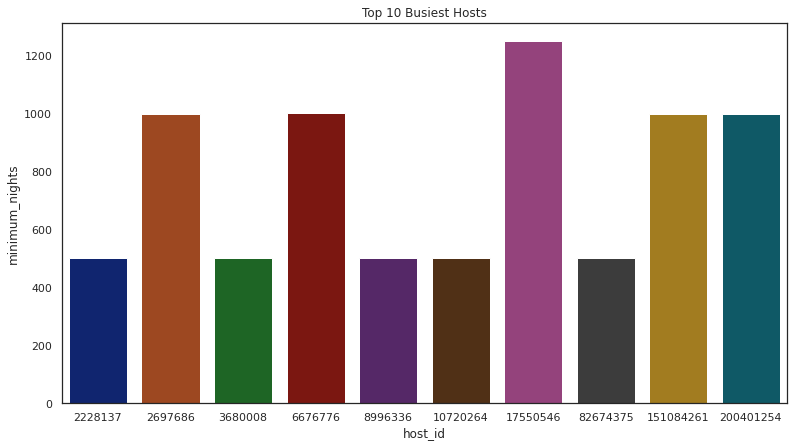

In [34]:
plt.figure(figsize=(13,7))
viz_4=sns.barplot(x="host_id", y="minimum_nights", data=top_10_busiest_hosts,palette='dark', alpha=1)   
plt.title("Top 10 Busiest Hosts")


##<b>Host ID "219517861" is the most busiest host across NYC with a count of 327 listing to manage across NYC !!!</b> 

In [35]:
#Lets find out the host with the maximum listing on Airbnb site for NYC
busiest_hosts_2=airbnb.host_id.value_counts().head(1)
busiest_hosts_2

219517861    327
Name: host_id, dtype: int64

##<b>Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?</b>

##<b>Manhatten has the highest mean of minimum nights occupancy which mean guest prefer to stay longer duration hence reducing the availability of hosts thereby increasing the traffic of prospective guests at Airbnb continously looking for a vacant choice of stay. Bronx on the other hand has scarce traffic.</b>

In [36]:
# Looking for the mean values of minimum nights occupancy to determine the  traffic across neighbourhood groups
airbnb.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        8.579151
Brooklyn         6.056556
Queens           5.181433
Staten Island    4.831099
Bronx            4.560953
Name: minimum_nights, dtype: float64

In [37]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

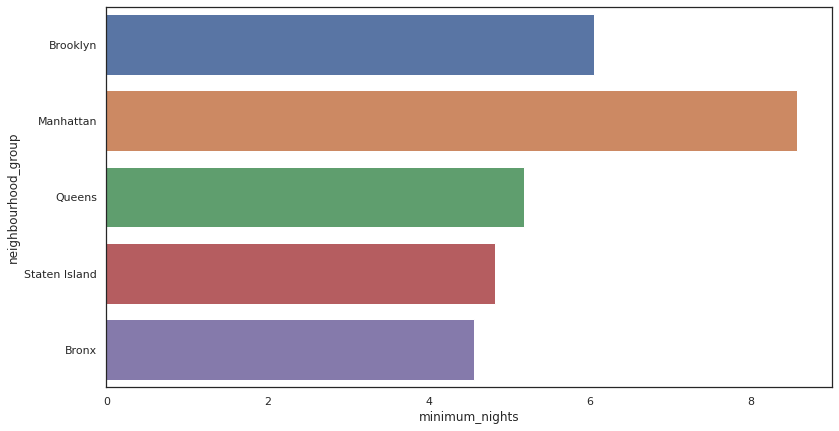

In [38]:
#plotting the mean values of minimum nights  against the neighborhood group
plt.figure(figsize=(13,7))
sns.barplot(x=airbnb.minimum_nights, y=airbnb.neighbourhood_group,ci=None) 

##<b> Spuyten Duyvil has the highest mean of minimum nights occupancy which mean guest prefer to stay longer duration hence reducing the availability of hosts thereby increasing the traffic of prospective guests at Airbnb continously looking for a vacant choice of stay. Claremont Village on the other hand has scarce traffic</b>


In [39]:
# Looking for the top 10 mean values of minimum nights spend by guest to determine the  traffic across neighbourhood
top_10_neighbourhood_traffic=airbnb.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False).head(10)
top_10_neighbourhood_traffic_df=pd.DataFrame(top_10_neighbourhood_traffic)
top_10_neighbourhood_traffic_df.reset_index(inplace=True)
top_10_neighbourhood_traffic_df.rename(columns={'index':'Neighbourhood', 'minimum_nights':'Mean_Minimum_Nights'}, inplace=True)
top_10_neighbourhood_traffic_df

,neighbourhood,Mean_Minimum_Nights
0,Spuyten Duyvil,48.250000
1,North Riverdale,41.400000
2,Battery Park City,30.328571
3,Olinville,23.500000
4,Vinegar Hill,18.352941
5,"Bay Terrace, Staten Island",16.500000
6,Mount Hope,15.950000
7,Greenwich Village,15.839286
8,Murray Hill,15.589691
9,Claremont Village,15.214286


Text(0.5, 0, 'Mean_Minimum_Nights')

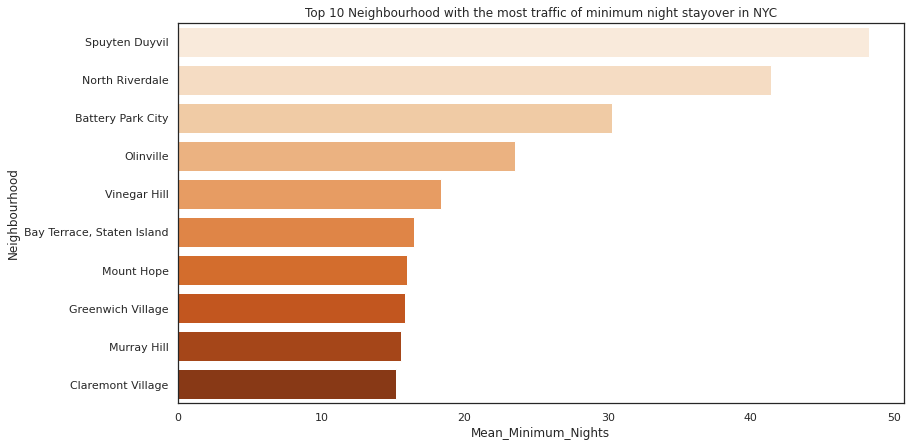

In [40]:
#Using seaborn barplot for visualization
#plotting the Top 10 mean values of minimum nights  against the neighborhood
plt.figure(figsize=(13,7))
viz_6=sns.barplot(y='neighbourhood', x='Mean_Minimum_Nights', data=top_10_neighbourhood_traffic_df,palette='Oranges')   
viz_6.set_title('Top 10 Neighbourhood with the most traffic of minimum night stayover in NYC')
viz_6.set_ylabel('Neighbourhood')
viz_6.set_xlabel('Mean_Minimum_Nights')